In [4]:
from create_graph import TSPGraphCreator
import configparser
from test_solution import get_graph_data
from TSP import TSP
from SimulatedAnnealing import SimulatedAnnealing
from graph_from_csv import GraphCreator
import pandas as pd
import itertools
from GenerateData import generate_data
import time

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:

config = configparser.ConfigParser()
config.read('config.ini')
db_host = config.get('Database', 'DB_HOST')
db_user = config.get('Database', 'DB_USER')
db_password = config.get('Database', 'DB_PASSWORD')

vrp_graph = TSPGraphCreator(db_host, db_user, db_password)
vrp_graph.create_vrp_graph()
vrp_graph.close()

In [25]:
graph_data = get_graph_data(db_host, db_user, db_password)

tsp = TSP(graph_data, 'Hub')
simulated_annealing = SimulatedAnnealing(tsp)
print(simulated_annealing.best_of_x(x=40, initial_temperature=2000, n=15,
                                    cooling_factor=0.1, minimum_temperature=0.99))


(['Hub', 'Location1', 'Location3', 'Location4', 'Location2'], 43.0)


In [26]:
# Esto puede tomar varios minutos
parameters = {
        'initial_temperature': [1000, 2000, 4000],
        'cooling_factor': [0.1, 0.3, 0.6],
        'n': [10, 20, 40]
    }

best_results = simulated_annealing.get_best_parameters(parameters)
best_results

[((1000, 0.1, 10), 43.0, 0.00035452842712402344),
 ((4000, 0.1, 10), 43.0, 0.00044226646423339844),
 ((2000, 0.1, 10), 43.0, 0.0005116462707519531),
 ((1000, 0.1, 20), 43.0, 0.0005860328674316406),
 ((1000, 0.3, 10), 43.0, 0.00067901611328125),
 ((4000, 0.3, 10), 43.0, 0.0008642673492431641),
 ((2000, 0.3, 10), 43.0, 0.0009644031524658203),
 ((2000, 0.1, 20), 43.0, 0.0011768341064453125),
 ((4000, 0.1, 20), 43.0, 0.0012722015380859375),
 ((1000, 0.3, 20), 43.0, 0.0019540786743164062),
 ((4000, 0.3, 20), 43.0, 0.002155303955078125),
 ((1000, 0.1, 40), 43.0, 0.0023889541625976562),
 ((2000, 0.3, 20), 43.0, 0.0024194717407226562),
 ((1000, 0.6, 10), 43.0, 0.0026488304138183594),
 ((2000, 0.6, 10), 43.0, 0.002908945083618164),
 ((2000, 0.1, 40), 43.0, 0.003252744674682617),
 ((4000, 0.6, 10), 43.0, 0.003467559814453125),
 ((4000, 0.1, 40), 43.0, 0.003863811492919922),
 ((1000, 0.3, 40), 43.0, 0.005616664886474609),
 ((2000, 0.3, 40), 43.0, 0.006200313568115234),
 ((2000, 0.6, 20), 43.0, 0.

(1000, 0.1, 10)


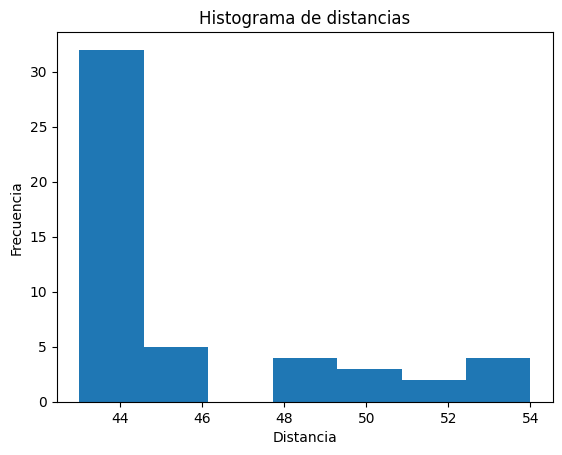

In [27]:
print(best_results[0][0])
SimulatedAnnealing.plot_n_results(simulated_annealing, 50, 10, *best_results[0][0])


In [28]:
df = pd.read_csv('random_distance_matrix.csv')
df.fillna(-1, inplace=True)
graph_creator = GraphCreator(db_host, db_user, db_password)
graph_creator.create_graph(df)
graph_creator.close()

In [30]:
graph_data = get_graph_data(db_host, db_user, db_password)

tsp = TSP(graph_data, 'l1')
simulated_annealing = SimulatedAnnealing(tsp)
print(simulated_annealing.best_of_x(x=40, initial_temperature=2000, n=15,
                                    cooling_factor=0.1, minimum_temperature=0.99))


(['l1', 'l4', 'l9', 'l3', 'l12', 'l15', 'l8', 'l2', 'l7', 'l10', 'l5', 'l6', 'l14', 'l13', 'l11'], 49.00000000000001)


In [31]:
# Esto puede tomar varios minutos
parameters = {
        'initial_temperature': [1000, 2000, 4000],
        'cooling_factor': [0.1, 0.3, 0.6],
        'n': [10, 20, 40]
    }

best_results = simulated_annealing.get_best_parameters(parameters, executions_per_combination=30)
best_results

[((2000, 0.3, 40), 59.0, 0.015978336334228516),
 ((1000, 0.6, 20), 60.0, 0.013742208480834961),
 ((1000, 0.6, 10), 61.0, 0.005005836486816406),
 ((4000, 0.1, 40), 61.0, 0.008005142211914062),
 ((1000, 0.6, 40), 61.0, 0.03761649131774902),
 ((4000, 0.6, 20), 63.0, 0.0215604305267334),
 ((1000, 0.3, 10), 64.0, 0.002104043960571289),
 ((2000, 0.3, 20), 64.0, 0.005384683609008789),
 ((1000, 0.1, 40), 64.0, 0.0054721832275390625),
 ((4000, 0.1, 10), 65.0, 0.001613616943359375),
 ((4000, 0.3, 10), 65.0, 0.003300189971923828),
 ((2000, 0.1, 40), 65.0, 0.0069866180419921875),
 ((1000, 0.3, 40), 65.0, 0.011418581008911133),
 ((2000, 0.1, 10), 68.0, 0.0021631717681884766),
 ((2000, 0.6, 10), 69.0, 0.007502079010009766),
 ((4000, 0.1, 20), 70.0, 0.003294229507446289),
 ((1000, 0.1, 10), 70.0, 0.005701780319213867),
 ((1000, 0.1, 20), 71.0, 0.003057241439819336),
 ((4000, 0.6, 40), 71.0, 0.05216479301452637),
 ((2000, 0.1, 20), 72.0, 0.004594326019287109),
 ((2000, 0.3, 10), 72.0, 0.00479960441589

(2000, 0.3, 40)


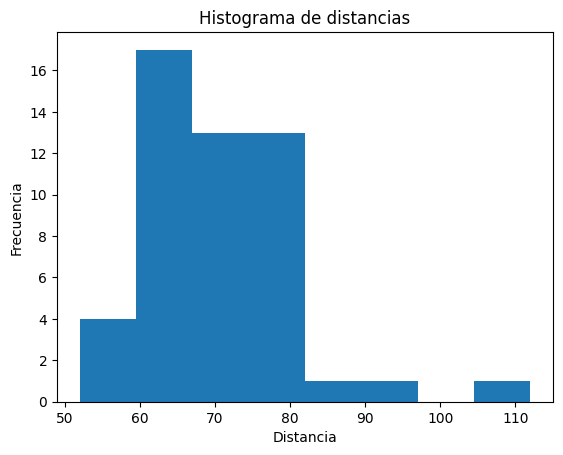

In [32]:
print(best_results[0][0])
simulated_annealing.plot_n_results(50, 10, *best_results[0][0])

In [34]:
for n in [5, 10, 20, 40, 60]:
    generate_data(n)

    # Create graph
    df = pd.read_csv('distance_matrix.csv')
    df.fillna(-1, inplace=True)
    graph_creator = GraphCreator(db_host, db_user, db_password)
    graph_creator.create_graph(df)
    graph_creator.close()

    print(f"Matriz de tamaño {n}")
    %timeit simulated_annealing.best_of_x(10, 10, *best_results[0][0])
    

Matriz de tamaño 5
173 ms ± 3.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matriz de tamaño 10
183 ms ± 6.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matriz de tamaño 20
187 ms ± 8.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matriz de tamaño 40
174 ms ± 9.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matriz de tamaño 60
182 ms ± 3.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
